# Title : KNN Example - Iris 분류하기 

In [524]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # 오류 발생을 막아줌.

### Iris 데이터 불러오기, 전처리 

In [525]:
from sklearn.datasets import load_iris # sklearn와 seaborn에서 데이터를 가지고 올 수 있지만, dataframe 형식으로 반환되는 seaborn 사용

sk_iris = load_iris()

In [526]:
import seaborn as sns
iris = sns.load_dataset('iris') # seaborn으로 데이터를 불러온다.

In [527]:
X = iris.drop('species', axis = 1) # y에 해당하는 species를 제외하고 X를 구성한다.

In [528]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # 문자를 0부터 시작하는 정수형 숫자로 바꿔줌

# train data로 학습된 Scaler()의 parameter를 통해 test data의 feature 값들이 스케일 되는 것
y = le.fit_transform(iris['species'].values)

### EDA

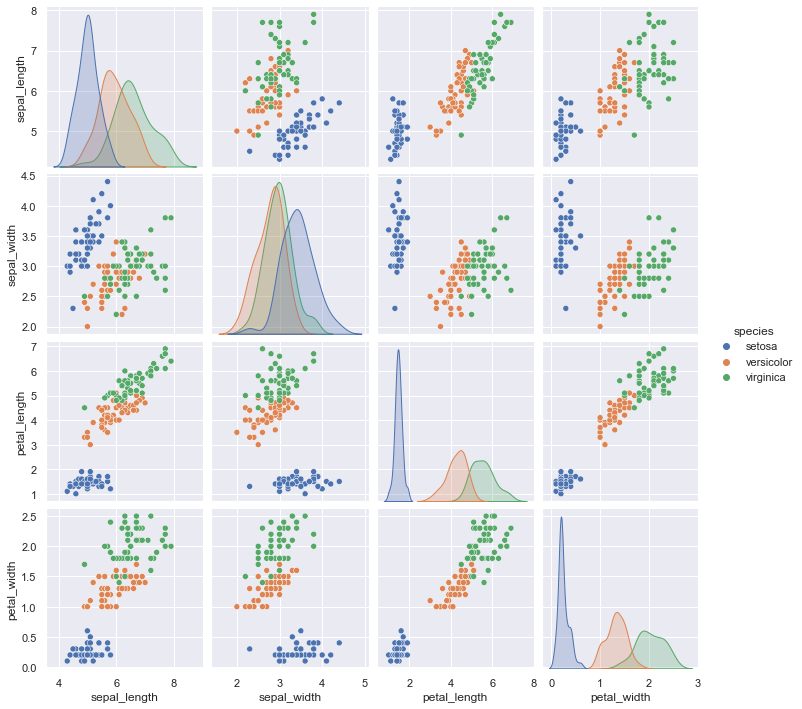

In [529]:
sns.pairplot(iris, hue = 'species', height = 2.5)
plt.show()

In [530]:
from sklearn.model_selection import train_test_split

[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size = 0.2, random_state = 777, stratify = y)

###  Feature Scaling

In [531]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # (X-υ)/σ
sc.fit(X_train)
X_train_std = sc.transform(X_train) # Training set 표준화, 
X_test_std = sc.transform(X_test)   # Test set 표준화

### Fitting

In [532]:
from sklearn.neighbors import KNeighborsClassifier # KNN

knn = KNeighborsClassifier(n_neighbors=6, p=2)

knn.fit(X_train_std, y_train)
y_train_pred = knn.predict(X_train_std)
print('Misclassified test samples: %d' %(y_train!=y_train_pred).sum())

Misclassified test samples: 3


### Validation Error 

In [533]:
y_test_pred = knn.predict(X_test_std)
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum())

Misclassified test samples: 1


In [534]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Accuracy
print("Accuracy :", str(round(accuracy_score(y_test, y_test_pred),4)*100) +"%")

Accuracy : 96.67%


In [535]:
conf = confusion_matrix(y_true=y_test, y_pred = y_test_pred)
print(conf)

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [536]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size = 0.2, random_state = 777, stratify = y)

sc = StandardScaler() # (X-υ)/σ
sc.fit(X_train)
X_train_std = sc.transform(X_train) # Training set 표준화, 
X_test_std = sc.transform(X_test)   # Test set 표준화

knn = KNeighborsClassifier(n_neighbors=6, p=2)

knn.fit(X_train_std, y_train)
y_train_pred = knn.predict(X_train_std)
print('Misclassified test samples: %d' %(y_train!=y_train_pred).sum())

### Decision regions
#### 단, 표준화된 set과 표준화되지 않은 set을 비교하기 위해 데이터를 나누는 것부터 다시 시작하였습니다.

In [ ]:
[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size = 0.2, random_state = 777, stratify = y)

knn = KNeighborsClassifier(n_neighbors=6, p=2)

knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)

iris_dataframe = pd.DataFrame(X_train, columns=X.columns)
yo = le.inverse_transform(y_train_pred)
iris_dataframe['species'] = yo

In [537]:
iris_dataframe = pd.DataFrame(X_train_std, columns=X.columns)
yo = le.inverse_transform(y_train_pred)
iris_dataframe['species'] = yo

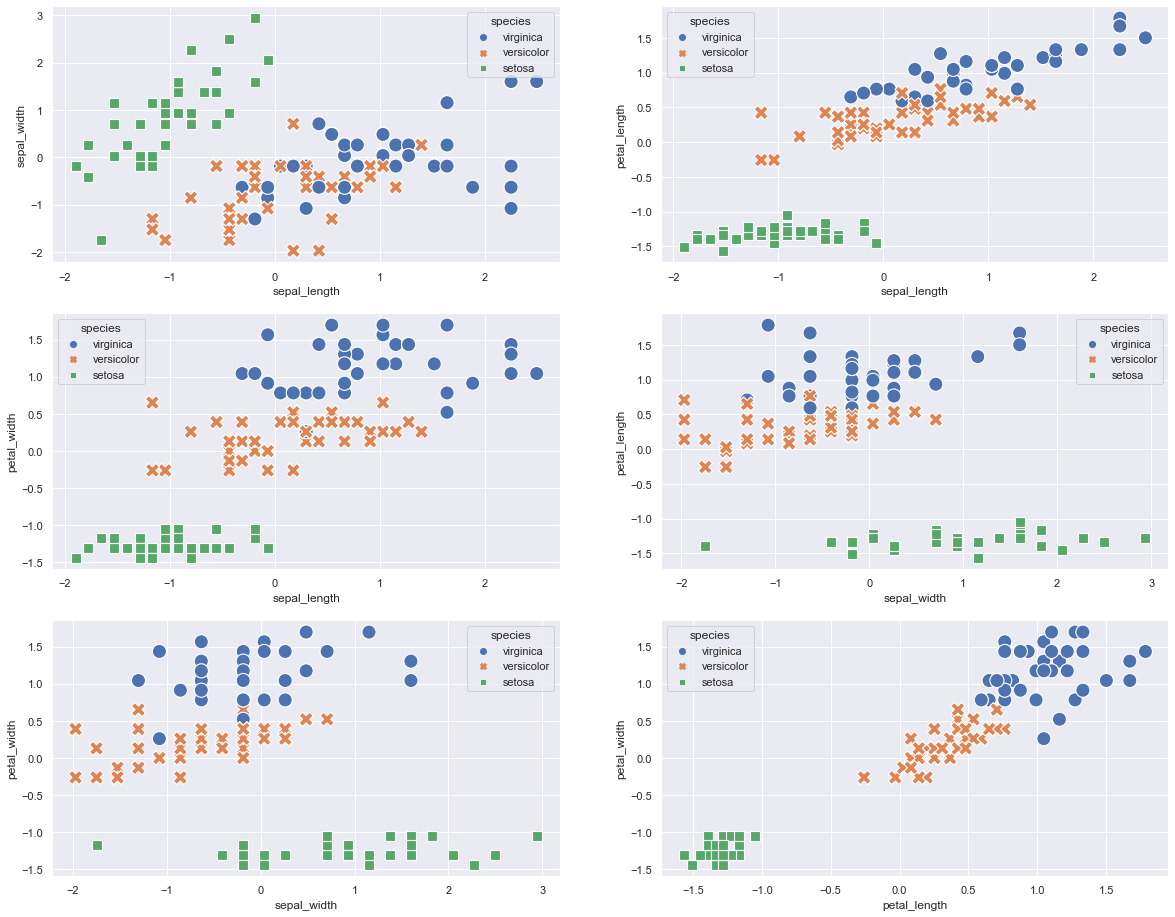

In [538]:
sns.set(rc = {'figure.figsize':(20,16)})
a = 0
for i in range(3):
    for j in range(i+1,4):
        a+=1
        sns.scatterplot(x=iris_dataframe.columns[i], 
                        y=iris_dataframe.columns[j], 
                        hue='species', # different colors by group
                        style='species', # different shapes by group
                        s=200, # marker size
                        data=iris_dataframe,
                        ax = plt.subplot(3,2,a),
                        )


## 최적의 K 선택

### Validation_curve(표준화하지 않은 X_train을 사용한 경우)

In [539]:
n_neighbor_range = 20

In [542]:
from sklearn.model_selection import cross_val_score

li_train = []
li_test = []
accuracy = []

for k in range(1,n_neighbor_range): # 1 ~ 16까지 n_neighbors의 변화에 따른 성능 시각화
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    classifier.fit(X_train, y_train)
    
    accuracy.append(classifier.score(X_train_std, X_test_std))
    predict = classifier.predict(X_test)
    
    li_train.append(classifier.score(X_train, y_train))
    li_test.append((predict==y_test).mean())

print(clf.score(X_train, y_train))
print(round((predict==y_test).mean()*100,2),"%")
print(round(cross_val_score(classifier, X_train, y_train, cv=10).mean()*100,2),"%")
    
plt.figure(figsize=(12, 9))
plt.plot(range(1, n_neighbor_range), li_train, label='TRAIN set')
plt.plot(range(1, n_neighbor_range), li_test, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, n_neighbor_range, step=1))
plt.legend()
plt.show();

NameError: name 'validation_data' is not defined

### Validation_curve(fit_transform으로 표준화한 X_train_sc를 사용한 경우)

0.9666666666666667
96.67 %
95.83 %


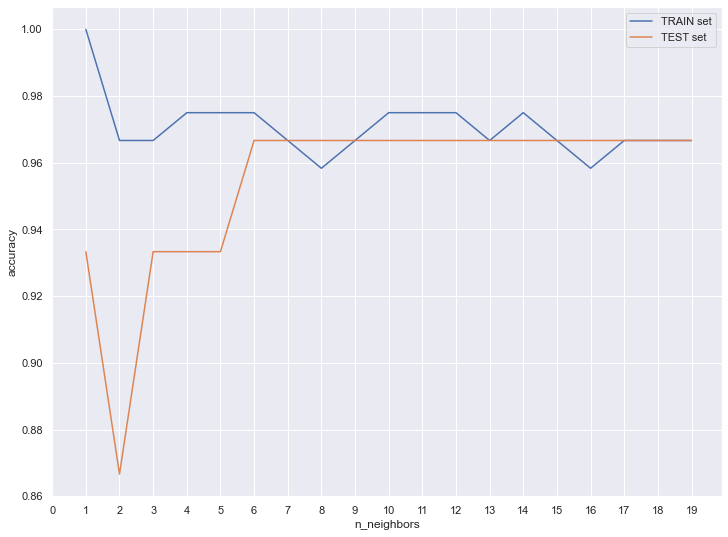

In [541]:
from sklearn.model_selection import cross_val_score

li_train = []
li_test = []
for k in range(1,n_neighbor_range): # 1 ~ 16까지 n_neighbors의 변화에 따른 성능 시각화
    clf = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    clf.fit(X_train_std, y_train)
    predict = clf.predict(X_test_std)
    li_train.append(clf.score(X_train_std, y_train))
    li_test.append((predict==y_test).mean())

print(clf.score(X_train_std, y_train))
print(round((predict==y_test).mean()*100,2),"%")
print(round(cross_val_score(clf, X_train_std, y_train, cv=10).mean()*100,2),"%")
plt.figure(figsize=(12, 9))
plt.plot(range(1, n_neighbor_range), li_train, label='TRAIN set')
plt.plot(range(1, n_neighbor_range), li_test, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, n_neighbor_range, step=1))
plt.legend()
plt.show();

### 스케일링 하지 않은 데이터로 다시 해보기

In [197]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [198]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
print('Misclassified training samples : %d' %(y_train!=y_train_pred).sum())
print('Misclassified test samples : %d' %(y_test!=y_test_pred).sum())

Misclassified training samples : 4
Misclassified test samples : 1


In [209]:
print('Accuracy_score : ' + str(round(accuracy_score(y_test, y_test_pred)*100,2))+'%')

Accuracy_score : 96.67%


In [201]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(conf)

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


#### GridSearchCV : 
    estimator : classifier, regressor, pipline이 사용될 수 있다.
    param_grid : 파라미터로 사용할 것들 지정(dict 형식)
    scoring : 예측 성능을 측정할 평가 방법
    cv : 교차 검증을 위해 분할되는 폴드 수
    refit : True면 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객채를 해당 하이퍼 파라미터로 재학습시킨다.

In [51]:
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1, 50))
n_neighbors = list(range(1,30)) # 1 ~ 29까지 n_neighbors의 변화에 따른 성능 시각화
p = [1,2] # p가 1이면 멘하튼 거리, p가 2이면 유클리디안 거리
params = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
                 
new_knn = KNeighborsClassifier()
clf = GridSearchCV(new_knn, params, cv = 10)
best_model = clf.fit(X,y)

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 13
